In [65]:
import numpy as np
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

In [66]:
def d(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [67]:
digits = load_digits()
data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

In [68]:
# maybe vectorize => takes about 20 seconds now
D = np.empty((data.shape[0],data.shape[0]))
for idx1, elem1 in enumerate(data):
    for idx2, elem2 in enumerate(data):
        D[idx1,idx2] = d(elem1,elem2)

In [69]:
S = np.argsort(D)

In [73]:
def p(x, m, S, data, target):
    label = target[x]
    S_x = S[x][:m]
    TP = np.sum(target[S_x] == label)
    FP = np.sum(target[S_x] != label)
    N = np.sum(target == label)
    precision = TP / (TP + FP)
    recall = TP / N
    return precision, recall

In [110]:
# vectorize? => takes about 2min
P = np.empty((data.shape[0],data.shape[0]))
R = np.empty((data.shape[0],data.shape[0]))
for idx1 in range(data.shape[0]):
    for idx2 in range(data.shape[0]):
        precision, recall = p(idx1, idx2+1, S, data, target)
        P[idx1, idx2] = precision
        R[idx1, idx2] = recall

In [157]:
P_avg = []
R_avg = []
for k in range(10):
    ktargets = np.where(target == k)
    kprecisions = P[ktargets]
    P_avg.append(np.average(kprecisions, axis=0))

    krecall= R[ktargets]
    R_avg.append(np.average(krecall, axis=0))



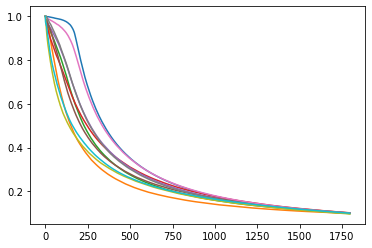

In [159]:
for k in range(10):
    plt.plot(range(1797), P_avg[k])

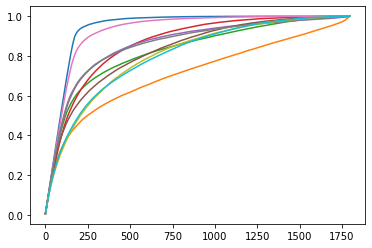

In [161]:
for k in range(10):
    plt.plot(range(1797), R_avg[k])